In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
%matplotlib inline

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Targets, Length: 150, dtype: int32


Text(0.5,1,'Petal')

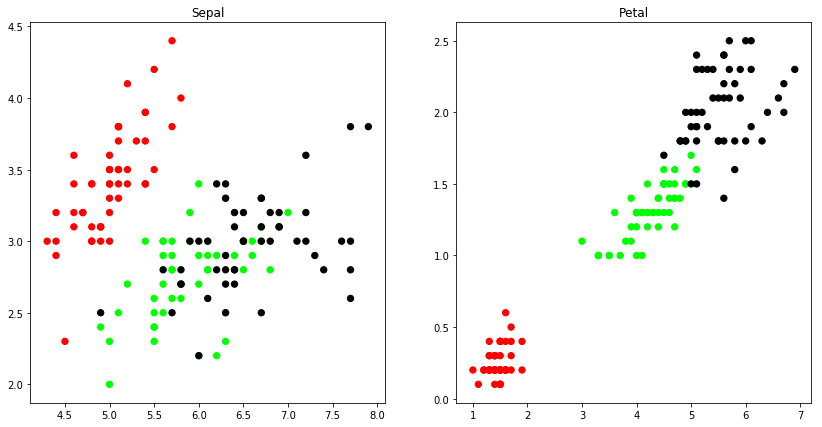

In [89]:
#LOAD THE DATA AND PLOT THE GRAPH FOR Y_TARGETS
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
print(y.Targets)

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

In [90]:
#BUILD THE KMEANS MODEL
model = KMeans(n_clusters=3)
model.fit(X)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5,1,'KMEANS CLASSIFICATION')

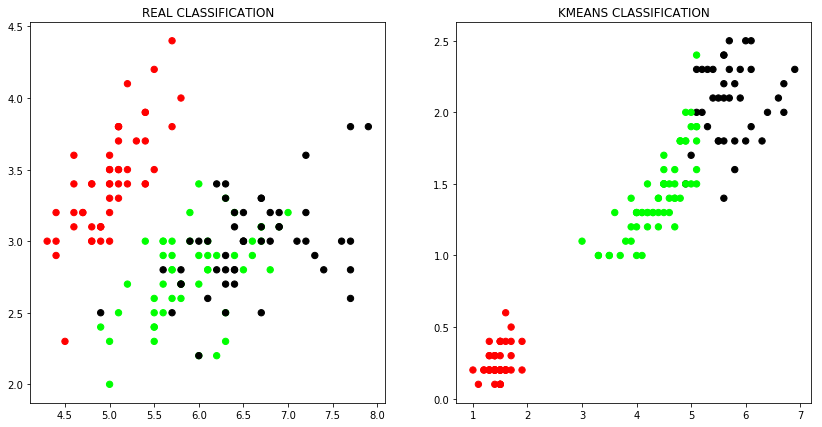

In [91]:
#VISUALIZE THE CLASSIFIER
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('REAL CLASSIFICATION')
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('KMEANS CLASSIFICATION')

In [92]:
#APPLY FIX 
#CONVERT THE 0->1 and 1->0
predx = np.choose(model.labels_,[0,1,2]).astype(np.int64)
print(predx)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Text(0.5,1,'KMEANS')

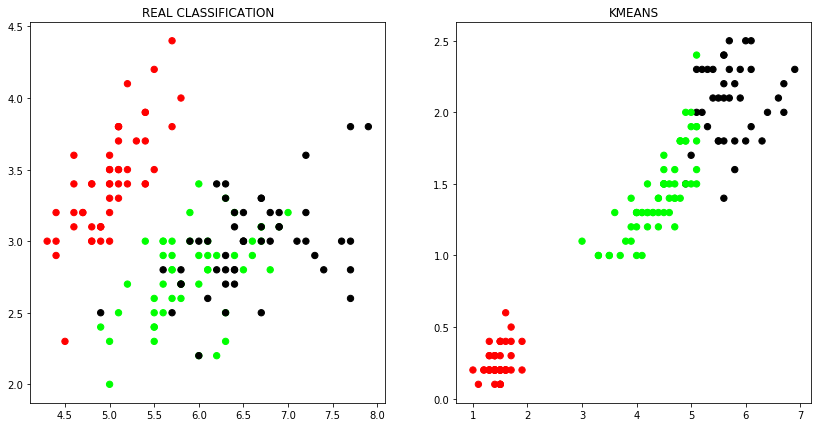

In [93]:
#PLOT AGAINST THE PREDX AND Y-TARGETS
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('REAL CLASSIFICATION')
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[predx], s=40)
plt.title('KMEANS')

In [94]:
#PRINT THE ACCURACY BTW THE TARGETS AND MODELS
print(sm.accuracy_score(y,model.labels_))

0.8933333333333333


In [95]:
print(sm.confusion_matrix(y,model.labels_))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [96]:
#GMM
#TRANSFORMING THE DATA USING STANDARD SCALAR
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
scalar.fit(X)
XSA = scalar.transform(X)
XD = pd.DataFrame(XSA,columns=X.columns)
print(XD.sample(5))

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
133      0.553333    -0.587764      0.762759     0.396172
26      -1.021849     0.800654     -1.227541    -1.050031
123      0.553333    -0.819166      0.649027     0.790591
134      0.310998    -1.050569      1.047087     0.264699
47      -1.506521     0.337848     -1.341272    -1.312977


In [97]:
#FIT THE DATAFRAME AND PREDICT
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
gmm.fit(XD)
gmm_pred = gmm.predict(XD)
gmm_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

0.9666666666666667
[[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


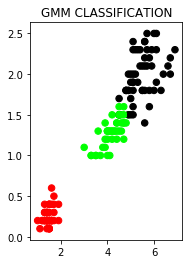

In [98]:
#PLOT THE GRAPH AND FIND THE ACCURACY
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[gmm_pred],s=42)
plt.title("GMM CLASSIFICATION")

print(sm.accuracy_score(y,gmm_pred))
print(sm.confusion_matrix(y,gmm_pred))